## Learning Support Vector Regression
Data: http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
import sys
sys.path.insert(0, '../src')
import regression_functions_utils as rfu

### Load data

In [3]:
f = "/Users/tarajano/stud/data_analysis_stats_ml_mix/data/autos/imports-85_ready.csv"
dtf = pd.read_csv(f, na_values=['?','|'])

# Replacing
num_dct  = {'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}
rplc_dct = {'num_of_cylinders': num_dct, 'num_of_doors': num_dct}
dtf.replace(rplc_dct, inplace=True)

print('Autos independent variables and types\n')
print(dtf.dtypes)

Autos independent variables and types

symboling              int64
normalized_losses    float64
make                  object
fuel_type             object
aspiration            object
num_of_doors         float64
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders       int64
engine_size            int64
fuel_system           object
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object


### Regressing car `width` vs `length`

AxesSubplot(0.125,0.125;0.775x0.755)


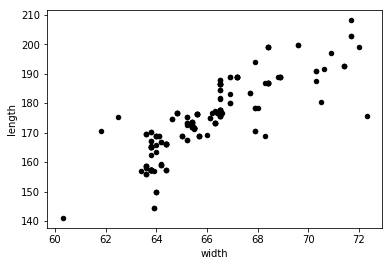

In [4]:
p = dtf.plot.scatter(x='width', y='length', c='black')
print(p)

### Prepare variables

In [5]:
X = dtf['width'].values.reshape(-1,1)
y = dtf['length']

In [6]:
# Linear 
svr_lin = SVR(kernel='linear')
svr_lin.fit(X, y)
lin_pred = svr_lin.predict(X)
print('lin_pred', r2_score(y,lin_pred))

# Poly
svr_pol = SVR(kernel='poly', degree=2, gamma='scale')
svr_pol.fit(X, y)
pol_pred = svr_pol.predict(X)
print('pol_pred', r2_score(y, pol_pred))

# RBF 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma='scale')
svr_rbf.fit(X, y)
rbf_pred = svr_rbf.predict(X)
print('rbf_pred', r2_score(y, rbf_pred))

# Sigmoid
svr_sig = SVR(kernel='sigmoid', C=1e3, gamma='scale')
svr_sig.fit(X, y)
sig_pred = svr_sig.predict(X)
print('sig_pred', r2_score(y, sig_pred))

lin_pred 0.705803591856748
pol_pred 0.6807215414941108
rbf_pred 0.8043656459943479
sig_pred -0.005949249741178164


### RBF predictions errors

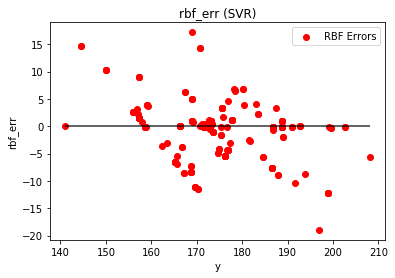

In [7]:
rbf_err = rbf_pred - y
plt.scatter(y, rbf_err, c='red', label='RBF Errors')
plt.hlines(0, min(y), max(y), color='black', alpha=.8)
plt.xlabel('y')
plt.ylabel('rbf_err')
plt.title('rbf_err (SVR)')
plt.legend()
plt.show()

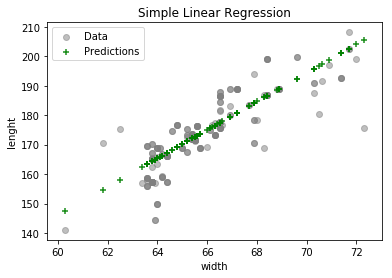

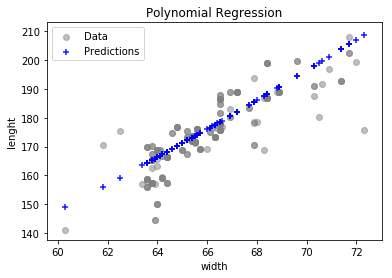

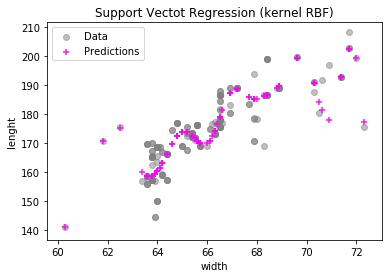

In [8]:
# Plots

def plotter(p):
    for l in p:
        t = l[0]
        c = l[1]
        d = l[2]

        plt.scatter(X, y, c='gray', label='Data', alpha=0.5)
        plt.scatter(X, d, c=c, alpha=0.9, label='Predictions', marker='+')
        plt.title(t)
        plt.xlabel('width')
        plt.ylabel('lenght')
        plt.legend()
        plt.show()
        
p = [
    ['Simple Linear Regression', 'green', lin_pred],
    ['Polynomial Regression', 'blue', pol_pred],
    ['Support Vectot Regression (kernel RBF)', 'magenta', rbf_pred]
]

plotter(p)

### Playing with C parameter
C controls the _smoothness_ of the decision boundary

In [9]:
rbf_preds = dict()

# RBF 
svr_rbf = SVR(kernel='rbf', C=1e1, gamma='scale')
svr_rbf.fit(X, y)
rbf_preds['c1e1'] = svr_rbf.predict(X)
print('C=1e1, rbf_pred', r2_score(y, rbf_preds['c1e1']))

# RBF 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma='scale')
svr_rbf.fit(X, y)
rbf_preds['c1e3'] = svr_rbf.predict(X)
print('C=1e3, rbf_pred', r2_score(y, rbf_preds['c1e3']))

# RBF 
svr_rbf = SVR(kernel='rbf', C=1e6, gamma='scale')
svr_rbf.fit(X, y)
rbf_preds['c1e6'] = svr_rbf.predict(X)
print('C=1e6, rbf_pred', r2_score(y, rbf_preds['c1e6']))

C=1e1, rbf_pred 0.7613573291383356
C=1e3, rbf_pred 0.8043656459943479
C=1e6, rbf_pred 0.813415790106269


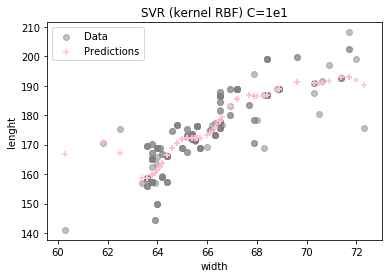

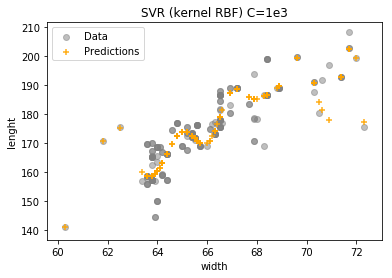

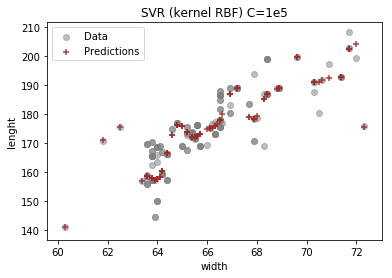

In [10]:
p = [
    ['SVR (kernel RBF) C=1e1', 'pink',   rbf_preds['c1e1']],
    ['SVR (kernel RBF) C=1e3', 'orange', rbf_preds['c1e3']],
    ['SVR (kernel RBF) C=1e5', 'brown',  rbf_preds['c1e6']]
]

plotter(p)

### Regressing `highway_mpg` vs `price`

AxesSubplot(0.125,0.125;0.775x0.755)


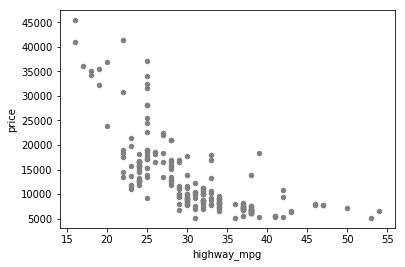

In [11]:
p = dtf.plot.scatter(x='highway_mpg', y='price', c='gray')
print(p)

In [12]:
dtf2 = dtf[['highway_mpg', 'price']].copy()
dtf2.dropna(inplace=True)
X = np.array(dtf2.highway_mpg).reshape(-1,1)
y = dtf2.price

In [13]:
preds = dict()

# Linear 
svr_lin = SVR(kernel='linear')
svr_lin.fit(X, y)
preds['lin_pred'] = svr_lin.predict(X)
print('lin_pred', r2_score(y, preds['lin_pred']))

# Poly
svr_pol = SVR(kernel='poly', degree=2, gamma='scale')
svr_pol.fit(X, y)
preds['pol_pred'] = svr_pol.predict(X)
print('pol_pred', r2_score(y, preds['pol_pred']))

# RBF 
svr_rbf = SVR(kernel='rbf', C=1e3, gamma='scale')
svr_rbf.fit(X, y)
preds['rbf_pred'] = svr_rbf.predict(X)
print('rbf_pred', r2_score(y, preds['rbf_pred']))

lin_pred 0.2811181663002057
pol_pred 0.31896315454706325
rbf_pred 0.45071395247533164


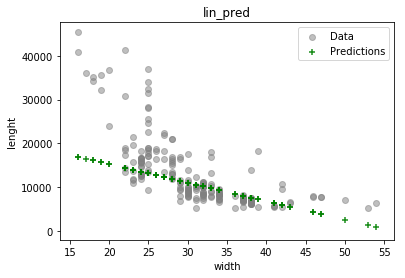

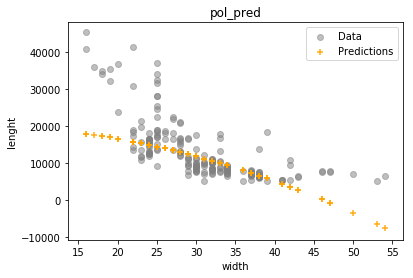

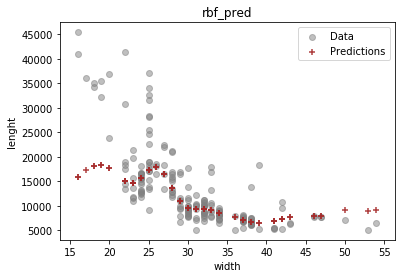

In [14]:
p = [
    ['lin_pred', 'green',  preds['lin_pred']],
    ['pol_pred', 'orange', preds['pol_pred']],
    ['rbf_pred', 'brown',  preds['rbf_pred']]
]

plotter(p)

Results are not great. However there is a large scale disparity between `highway_mpg` and `price`. Let's try scaling `price`

### Feature scaling `price`

https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

*A target variable with a large spread of values, in turn, may result in large error gradient values causing weight values to change dramatically, making the learning process unstable. Scaling input and output variables is a critical step in using neural network models.* 

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y = dtf2.price
y = np.array(y).reshape(-1,1)
y = scaler.fit_transform(y)
y = y.reshape(1,-1)[0]

__Comparing Standard Deviations of original and scaled `price`__

In [16]:
print('Standard Deviation')
print('price (orig): ', dtf2.price.std())
print('price (scld): ', y.std())

Standard Deviation
price (orig):  7947.066341939274
price (scld):  1.0


In [17]:
preds = dict()

reg_alg = {
    'linear': SVR(kernel='linear'),
    'poly': SVR(kernel='poly', degree=2, gamma='scale'),
    'rbf': SVR(kernel='rbf', C=100, gamma=0.1)
}

for k in reg_alg:
    m = reg_alg[k]
    m.fit(X, y)
    p = m.predict(X)
    r = r2_score(y, p)
    preds[k] = [p, r]

In [18]:
for m, r in preds.items():
    print(m, 'rscore', r[1])

linear rscore 0.42841957350373183
poly rscore 0.32855926702213367
rbf rscore 0.7385539542343802


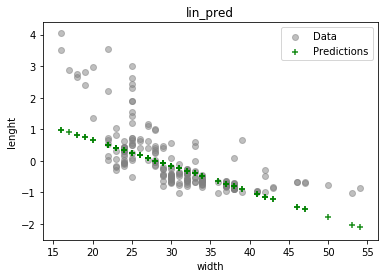

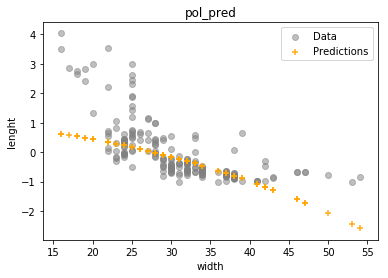

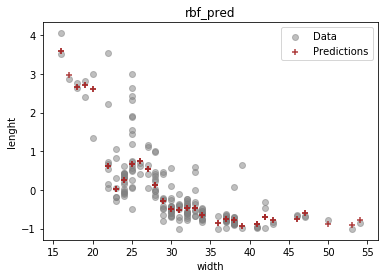

In [19]:
p = [
    ['lin_pred', 'green',  preds['linear'][0]],
    ['pol_pred', 'orange', preds['poly'][0]],
    ['rbf_pred', 'brown',  preds['rbf'][0]]
]

plotter(p)

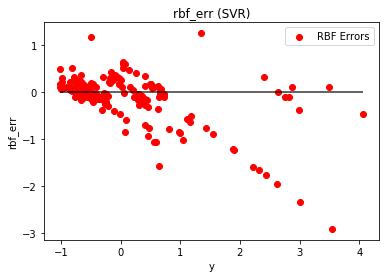

In [20]:
rbf_err = preds['rbf'][0] - y
plt.scatter(y, rbf_err, c='red', label='RBF Errors')
plt.hlines(0, min(y), max(y), color='black', alpha=.8)
plt.xlabel('y')
plt.ylabel('rbf_err')
plt.title('rbf_err (SVR)')
plt.legend()
plt.show()

## Multiple regressions

In [21]:
dtf3 = dtf[['highway_mpg', 'horsepower', 'bore', 'price']].copy()
dtf3.dropna(inplace=True)
# X = np.array(dtf2[['highway_mpg', 'horsepower', 'bore']])
y = dtf3.price

In [22]:
for c in list(dtf3.columns):
    dtf3[c] = StandardScaler().fit_transform(np.array(dtf3[c]).reshape(-1,1))
X = dtf3[['highway_mpg', 'horsepower', 'bore']].copy()
y = dtf3.price.values

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [23]:
for k in reg_alg:
    m = reg_alg[k]
    m.fit(X, y)
    p = m.predict(X)
    r = r2_score(y, p)
    preds[k] = [p, r]

In [24]:
for m, r in preds.items():
    print(m, 'rscore', r[1])

linear rscore 0.6115060541173787
poly rscore 0.21792893972083627
rbf rscore 0.8219582361670241


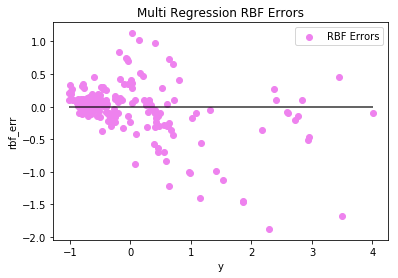

In [25]:
rbf_err = preds['rbf'][0] - y
plt.scatter(y, rbf_err, c='violet', label='RBF Errors')
plt.hlines(0, min(y), max(y), color='black', alpha=.8)
plt.xlabel('y')
plt.ylabel('rbf_err')
plt.title('Multi Regression RBF Errors')
plt.legend()
plt.show()

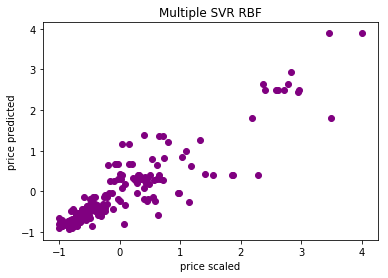

In [26]:
plt.scatter(y, preds['rbf'][0], c='purple')
plt.xlabel('price scaled')
plt.ylabel('price predicted')
plt.title('Multiple SVR RBF')
plt.show()

In [27]:
# HERE Compute quality of the model.
# pvalues of variables
# adj. r2
# mann-whitney similars.

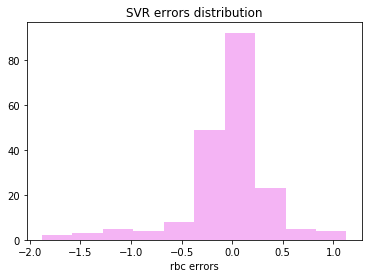

In [34]:
plt.hist(rbf_err, color='violet', alpha=.6)
plt.xlabel('rbc errors')
plt.title('SVR errors distribution')
plt.show()

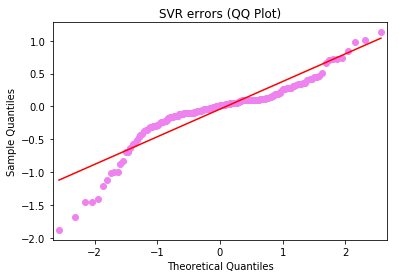

'Does not look normally distributed. It may be incorrect to estimate model performance based on method such as R2'

In [39]:
from statsmodels.graphics.gofplots import qqplot
qqplot(rbf_err, line='s', color='violet')
plt.title('SVR errors (QQ Plot)')
plt.show()
'''Does not look normally distributed. It may be incorrect to estimate model performance based on method such as R2'''

#### Estimating normality of SVR errors

In [41]:
def shapiro_wilks_test(data):
    '''
        Params: <list>
        Returns a list of: statistic, p-value
    '''
    from scipy.stats import shapiro
    stat, p = shapiro(data)
    return [stat, p]

def test_H0(p_value):
    alpha = 0.05
    if p_value > alpha:
        print('Sample looks Gaussian (fail to reject H0 at alpha={:.3f})'.format(alpha))
    else:
        print('Sample does not look Gaussian (reject H0 at alpha={:.3f})'.format(alpha))
    print('')

In [56]:
sw_res = shapiro_wilks_test(rbf_err)
print('Normality test for {}'.format('SVR errors'))
print('Shapiro Wilks stat {} pvalue {}'.format(sw_res[0],sw_res[1]))
test_H0(sw_res[1])

Normality test for SVR errors
Shapiro Wilks stat 0.8616111278533936 pvalue 2.4873026815280808e-12
Sample does not look Gaussian (reject H0 at alpha=0.050)



### Cross-validation
https://scikit-learn.org/stable/modules/cross_validation.html

The simplest way to use cross-validation is to call the cross_val_score helper function on the estimator and the dataset. The following example demonstrates how to estimate the accuracy of a linear kernel support vector machine on the iris dataset by splitting the data, fitting a model and computing the score 5 consecutive times (with different splits each time)

In [69]:
from sklearn.model_selection import cross_val_score
# clf = svm.SVC(kernel='linear', C=1)
clf = SVR(kernel='rbf', C=100, gamma=.1)
scores = cross_val_score(clf, X, y, cv=5)
scores 

array([0.70513024, 0.69805882, 0.39318959, 0.37041978, 0.32151477])

The mean score and the 95% confidence interval of the score estimate are hence given by:

In [70]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.50 (+/- 0.34)
